 # Introduction to Data Science
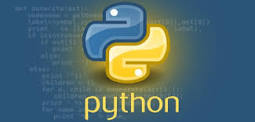
## By: Avanish Davuluri



## Project Requirements:
  ### 1) Formulate the Project Research Framework
  ### 2) Data Science Analysis
  ### 3) Data Science Algorithms
  ### 4) Data Science Life Cycle
  ### 5) Final Report (in a separate file)

## 1) Formulate the Project Research Framework
### a) Dataset Introduction:
      - The dataset is a list of the Annual Net Generation by State by Type of Producer by Energy Source for all 50 U.S. States and D.C.
### b) Research Topic and Research Goal:
      - Predict/simulate the relative percentages of energy types that California is and will be powered by
      - Calculate when California will be 100% powered by renewable energy sources
      
      Purpose of Research:
         Identify the changing trends in the energy production of California in order to evaluate which types of    energy sources should be further invested into and which energy sources should have reduced investment.
### c) Specific Research Questions:
      - Predict what year California will be 100% powered by renewable energy sources
      - Predict the relative percentages of energy types that Calfornia will be powered by in that year
     

## 2) Data Science Analysis


### a) Descriptive Statistics
### b) Numerical summaries

In [1]:
# *** Question 2a, 2b *** 
#Import Modules necessary for the rest of this script
import numpy as np #Not really used
import pandas as pd #For Dataframe capabilities
import matplotlib.pyplot as plt #For basic graphing later on
import seaborn as sns #Easily make matplotlib graphs look better

In [2]:
# *** Question 2a, 2b ***
#Reading file into a DataFrame
df = pd.read_excel("annual_generation_state.xls", skiprows = 1) #Excel since gov information is all excel files

In [3]:
# *** Question 2a, 2b ***
'''
Modify data so it is useful for my study by
Removing information about type of energy company, type of producer, states besides CA
'''
def adjustments(df):
    df = df.copy(deep = "True")
    df = df[df['TYPE OF PRODUCER'].str.contains('Total Electric Power Industry')] #Only have total production
    df.set_index('STATE', inplace = True) #Be able to index by state
    df.drop('TYPE OF PRODUCER', axis=1, inplace=True) #Not needed since production type is all total
    df_ca = df.loc['CA'].copy(deep = "True") #Only CA values
    return df_ca

df_ca = adjustments(df) 

In [4]:
# *** Question 2a, 2b ***
'''
My study is about the relative percentages of the different energy sources that CA uses
So, I need to have a dataframe showing relative percentages instead of the flat megawatthours in df_ca
'''
#Return percents of energy type out of total for any year in data
def calc_percs(year): 
    df_year = df_ca[df_ca['YEAR'] == year].copy(deep = "True") #Only values of that year
    df_year.set_index('ENERGY SOURCE', inplace = True) #Able to get total energy production
    df_year.drop('YEAR', axis=1, inplace=True) #Not needed since all values are for that year
    total_year = float(df_year.loc['Total']) #Total Energy Production for CA in that year
    df_raw = df_year.div(total_year, axis = 1) #Relative amount of energy production (total = 1)
    df_perc = df_raw.mul(100, axis = 1) #Covert relative amount to percentage value
    df_perc = df_perc.drop('Total')
    df_perc.sort_values(by=['GENERATION (Megawatthours)'], ascending=False, inplace = True) #sort from greatest to least
    return df_perc


all_years = pd.DataFrame() #Initialize empty dataframe

years_list = list(map(str, range(1990, 2021))) #Create list of years from 1990 - 2020
for i in range(0, len(years_list)): #Convert elements of list from str to int
    years_list[i] = int(years_list[i])
    
    
def year_en_type(energy_type): #Make dataframes of 1990 - 2020 percentages per energy type
    en_type = []
    for year in years_list:
        year_based = calc_percs(year)
        year_based = year_based.loc[energy_type]
        en_type.append(year_based)
    en_type = pd.DataFrame(en_type)
    en_type.rename(columns = {'GENERATION (Megawatthours)': energy_type}, inplace = True)
    en_type = en_type.assign(Year = years_list)
    en_type['Year'] = en_type['Year'].astype(int) #Convert year from float to int
    en_type.set_index('Year', inplace = True)
    all_years[energy_type] = en_type[energy_type]

def combine_datsets(col_names): #Combine all of the dataframes into all_years
    for name in col_names:
        year_en_type(name)

#Big Dataset for all percentages per energy type from 1990 - 2020
en_source_list = df_ca['ENERGY SOURCE'].tolist()
en_source_set = set(en_source_list)
en_source_set.remove('Total')
combine_datsets(en_source_set)
all_years = all_years.rename(columns = {'Solar Thermal and Photovoltaic':'Solar',
                                        'Hydroelectric Conventional':'Hydro'}) #Easier to Read

In [5]:
# *** Question 2a, 2b ***
#Display information about all_years_dataframe
print("Shape of dataset:", all_years.shape, "\n")
print("Data types of dataset:\n", all_years.dtypes, "\n")
print("Statistical summary of all variables:\n", all_years.describe(include = "all")) 

Shape of dataset: (31, 13) 

Data types of dataset:
 Coal                           float64
Other Gases                    float64
Nuclear                        float64
Pumped Storage                 float64
Other Biomass                  float64
Other                          float64
Natural Gas                    float64
Geothermal                     float64
Petroleum                      float64
Hydro                          float64
Solar                          float64
Wood and Wood Derived Fuels    float64
Wind                           float64
dtype: object 

Statistical summary of all variables:
             Coal  Other Gases    Nuclear  Pumped Storage  Other Biomass  \
count  31.000000    31.000000  31.000000       31.000000      31.000000   
mean    0.992916     1.048507  15.020908        0.158418       1.305627   
std     0.535481     0.376240   4.178393        0.408317       0.157582   
min     0.119165     0.569245   8.011224       -0.473220       1.048629   
25%     0.

### f) Null Values Handling
#### Doing this step here to ensure that graphs have all the right information and do not throw any errors

In [6]:
# *** Question 2 ***
#Identifying Missing values in all_types
print("Checking to see if there is any missing data:")
print("Each count of True means that there is 1 missing value for the variable under the True count")
print("")
missing_data = all_years.isnull() #Verify that all_types has no missing values
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")
print("No columns in all_types have any missing values. Congrats to the Department of Energy for being thorough with their datasets")

Checking to see if there is any missing data:
Each count of True means that there is 1 missing value for the variable under the True count

False    31
Name: Coal, dtype: int64

False    31
Name: Other Gases, dtype: int64

False    31
Name: Nuclear, dtype: int64

False    31
Name: Pumped Storage, dtype: int64

False    31
Name: Other Biomass, dtype: int64

False    31
Name: Other, dtype: int64

False    31
Name: Natural Gas, dtype: int64

False    31
Name: Geothermal, dtype: int64

False    31
Name: Petroleum, dtype: int64

False    31
Name: Hydro, dtype: int64

False    31
Name: Solar, dtype: int64

False    31
Name: Wood and Wood Derived Fuels, dtype: int64

False    31
Name: Wind, dtype: int64

No columns in all_types have any missing values. Congrats to the Department of Energy for being thorough with their datasets


### c) Graphical Summaries

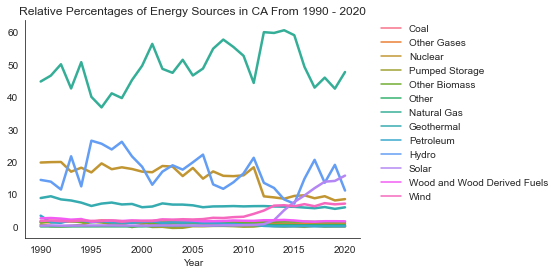

In [7]:
# *** Question 2c ***
#Graph all_years in a line graph
def line_graph(df, title):
    graph_title = title
    sns.set_style('white') #Set background to just white
    sns.lineplot(data = df, legend = "auto", ci=None, estimator = None, linewidth = 2.5, dashes = False).set_title(graph_title)
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) #Move legend out of graph
    sns.despine(right=True) #Remove line on the right
    sns.set(rc={'figure.figsize':(8,8)}) #Set figure size to width = 8 & height = 8
    save_to_png(df, graph_title) #Saving file needs to happen before showing it
    plt.show()

def save_to_png(graph, title): #Saves graph as a png
    plt.savefig(title + ".png", dpi = 600) #Takes time to render since it is a large file

line_graph(all_years, "Relative Percentages of Energy Sources in CA From 1990 - 2020")

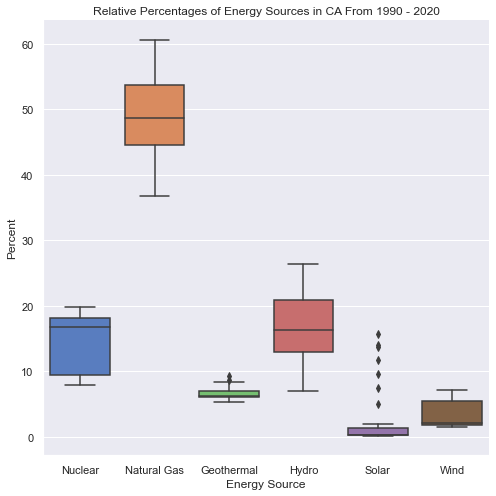

In [8]:
# *** Question 2c ***
#Create Boxplot for Quantitative Variables
all_years_to_plot = all_years.loc[:, all_years.max() >= 5] #Max >= 5%
sns.boxplot(data = all_years_to_plot, palette = "muted", dodge=False).set_title("Relative Percentages of Energy Sources in CA From 1990 - 2020")
sns.despine(right=True) #Remove line on the right
plt.xlabel('Energy Source')
plt.ylabel('Percent')
sns.set(rc={'figure.figsize':(10,10)}) #Set figure size to width = 10 & height = 10
#plt.show()

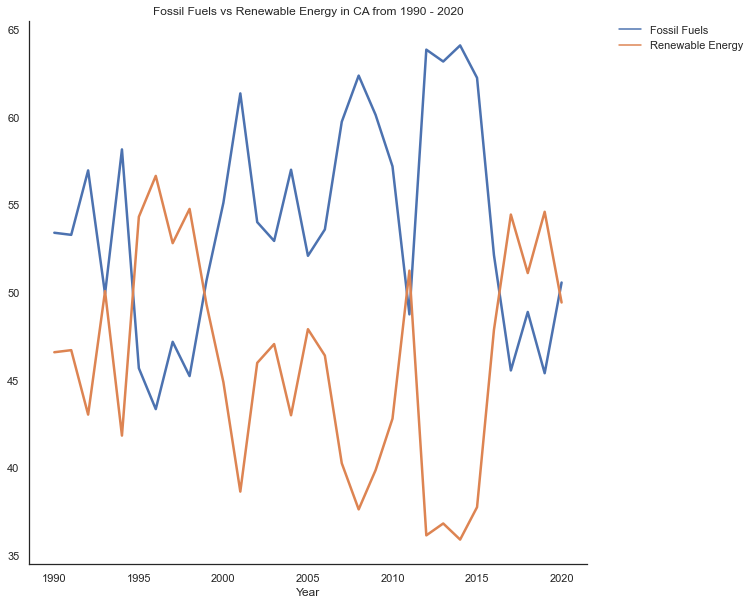

In [9]:
# *** Question 2c ***
# Calculate percentage of fossil fuels vs renewable energy produced
def cat_percs(df): #Create dataframe with 2 entries (fossil fuel and renewable energy) that have percent values
    df2 = df.copy(deep = "True")
    df2['Fossil Fuels'] = df['Coal'] + df['Natural Gas'] + df['Other Gases'] + df['Petroleum'] + df['Wood and Wood Derived Fuels'] + df['Other']
    df2['Renewable Energy'] = df['Geothermal'] + df['Pumped Storage'] + df['Hydro'] + df['Nuclear'] + df['Other Biomass'] + df['Solar'] + df['Wind']
    df2 = df2.loc[:, ['Fossil Fuels', 'Renewable Energy']]
    return df2

cat_df = cat_percs(all_years)

# Graph fossil fuel vs renewable energy percentages of California for 1990 and 2020
line_graph(cat_df, "Fossil Fuels vs Renewable Energy in CA from 1990 - 2020")

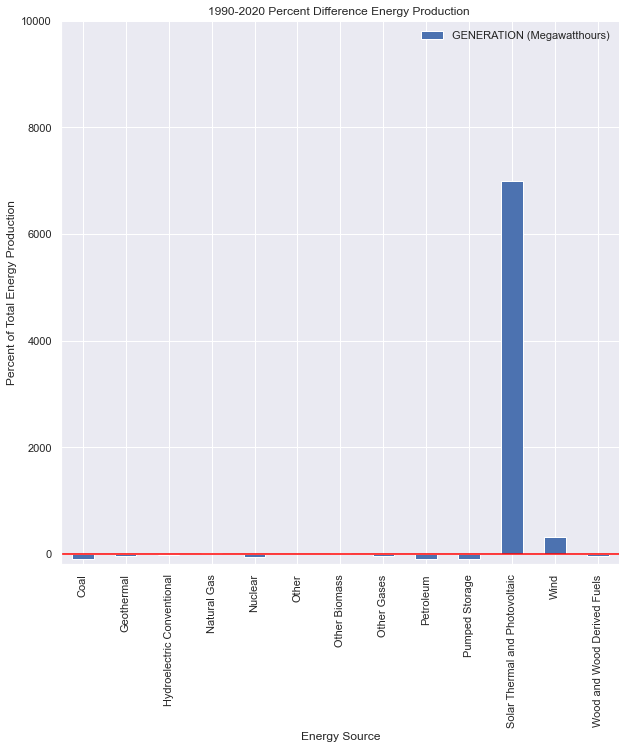

In [10]:
# *** Question 2c ***
# Calculate the percent change of energy production per type of energy for California between 1990 and 2020
energy_prod_1990 = calc_percs(1990) #Calculate relative energy percentages in 1990
energy_prod_2020 = calc_percs(2020) #Calculate relative energy percentages in 2020

diff = energy_prod_2020.subtract(energy_prod_1990, fill_value=0) #Difference between 2020 and 1990 values
diff_perc = diff.div(energy_prod_1990) #Get raw values
perc_inc = diff_perc.mul(100) #Get percentage values

# Graph the percent difference (from 1990 to 2020) of energy production per type of energy.
def perc_change_graph(df):
    bar_title = "1990-2020 Percent Difference Energy Production "
    df.plot(kind = 'bar',
            xlabel = 'Energy Source',
            ylabel = 'Percent of Total Energy Production',
            title = bar_title,
            figsize = (10, 10), #So that % decreases can be seen better
            ylim = (-200, 10000), #Just below min y value and just above max y value
           )
    plt.legend(frameon=False) #Remove box around legend
    sns.despine(right=True) #Remove line on the right
    plt.axhline(y=0, color = "red") #Red horizontal line to differentiate between % increase and % decrease
    save_to_png(df, bar_title) #Saving file needs to happen before showing it
    plt.show()
    
perc_change_graph(perc_inc)

### d) Analysis of Graphical Summaries
From 1990 to 2020, natural gas has been the overall largest source of California's energy (mean = 48.99%) and has even had a 6.56% increase in usage from 1990 to 2020. California's large usage of natural gas contributes to its
high usage of fossil fuels, with 1996-1998 (when renewable energy was a higher proportion of California's energy than fossil fuels) all being years with natural gas at a proportion well below its mean. Thus, natural gas is a large factor in California's usage of fossil fuels. The same is true for solar and renewables. Between 1990 and 2020, solar had a 6989% increase in usage, most of which was since 2012. At the same time as solar's exponential growth, renewable energy had a large increase in its relative proportion of California's use.

### e) Correlation and Regression
Wind and Solar Generation might be correlated


In [11]:
# *** Question 2e ***
#Find correlation coefficient between wind & solar
all_years.reset_index(inplace=True) #Make year a column that can be used as x axis
coeff = all_years[['Wind', 'Solar']].corr() #Can use all_years since it has both solar & natural gas
print("Correlation coefficient table between Wind & Solar:\n", coeff, "\n")

Correlation coefficient table between Wind & Solar:
            Wind     Solar
Wind   1.000000  0.854789
Solar  0.854789  1.000000 



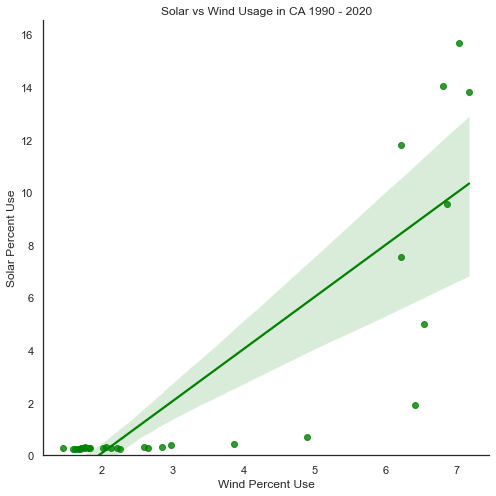

In [12]:
# *** Question 2e ***
#Scatter plot of wind & solar
sns.set_style('white') #Set background to just white
sns.regplot(x = "Wind", y = "Solar", data = all_years, color = "green").set_title("Solar vs Wind Usage in CA 1990 - 2020")
sns.despine(right=True) #Remove line on the right
plt.xlabel('Wind Percent Use')
plt.ylabel('Solar Percent Use')
plt.ylim(0,)
sns.set(rc={'figure.figsize':(8,8)}) #Set figure size to width = 5 & height = 5
plt.show()

#### Justification of Correlation:
   Wind and solar are both renewable energies, with both also having a strong positive linear relationship with
   time. This suggests that as the people and businesses of California invested in 1 type of renewable energy,
   their interest in renewable energy increased, causing them to also invest in other types of renewable energy.
   Their initial and subsequent investments may have been because of the positive environmental message
   associated with renewable energy.


## 3) Data Science Algorithms

### a) Simple Regression and Multiple Regression

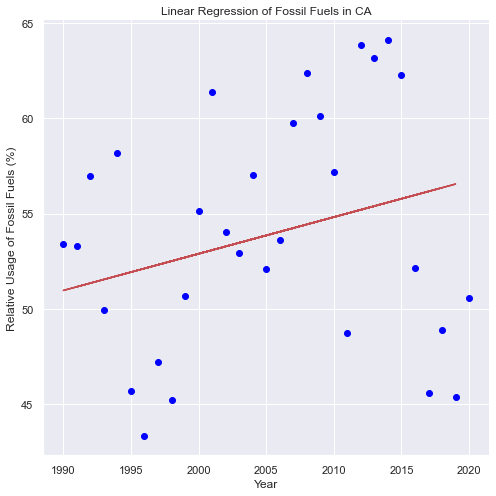

Evaluating accuracy for: Fossil Fuels
Mean absolute error: 4.87
Residual sum of squares (MSE): 30.20
R2-score: -0.51




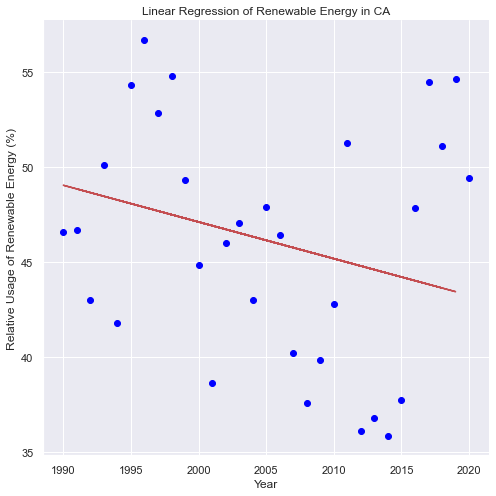

Evaluating accuracy for: Renewable Energy
Mean absolute error: 4.87
Residual sum of squares (MSE): 30.20
R2-score: -0.51


In [13]:
# *** Question 3a ***
#Simple Linear Regression 1 time each for fossil fuels and renewable energy
"""
I chose this model as part of the first steps into predicting the relative usage of fossil fuels and renewable
energy. Going into the model creation, I knew that linear regression was likely not appropriate for my data, but I
wanted to focus on the basics of predictions before delving deeper.
"""
cat_df.reset_index(inplace=True) #Make year a column that can be used as x axis

#Build + Test Linear Regression Model
from sklearn import linear_model
from sklearn.metrics import r2_score
def train_test(col):
    #Train/test split
    X = np.asanyarray(cat_df[['Year']])
    y = np.asanyarray(cat_df[[col]])
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    #Build model
    regr = linear_model.LinearRegression()
    regr.fit (X_train, y_train)
    
    #Plot model
    plt.scatter(cat_df['Year'], cat_df[col], color='blue')
    plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], '-r')
    plt.xlabel("Year")
    plt.ylabel("Relative Usage of " + col + " (%)")
    plt.title("Linear Regression of " + col + " in CA")
    sns.despine(right=True) #Remove line on the right
    plt.show()
    plt.close()
    
    #Test accuracy
    test_y_ = regr.predict(X_test)
    print("Evaluating accuracy for: " + col)
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
    print("R2-score: %.2f" % r2_score(y_test , test_y_) )
    
#Do Linear Regression for Fossil Fuel + Renewable Energy
train_test('Fossil Fuels')
print('\n')
train_test('Renewable Energy')


In [14]:
# *** Question 3a ***
#Analysis of Linear Regression
'''
Both fossil fuels and renewable energy have a low R2 score, suggesting that they cannot be accurately predicted by
linear regression. This can be confirmed by finding the correlation coefficient between year and fossil fuels &
between year and renewable energy. A correlation coefficient greater than 0.7 indicates a linear tendency
'''

#Correlation coefficient for fossil fuels
coeff_fossil = cat_df[['Year', 'Fossil Fuels']].corr() 
print("Correlation coefficient table between Year & Fossil Fuels:\n", coeff_fossil, "\n")

#Correlation coefficient for renewables
coeff_renewables = cat_df[['Year', 'Renewable Energy']].corr() 
print("Correlation coefficient table between Year & Renewable Energy:\n", coeff_renewables, "\n")

'''
Both Fossil Fuels and Renewable Energy have a correlation lower magnitude of  0.156005 (lower than 0.7)
with year. So, both fossil fuels and renewable energy cannot be accurately predicted by linear regression
'''

Correlation coefficient table between Year & Fossil Fuels:
                   Year  Fossil Fuels
Year          1.000000      0.156005
Fossil Fuels  0.156005      1.000000 

Correlation coefficient table between Year & Renewable Energy:
                       Year  Renewable Energy
Year              1.000000         -0.156005
Renewable Energy -0.156005          1.000000 



'\nBoth Fossil Fuels and Renewable Energy have a correlation lower than 0.7 with year. So, both fossil fuels and\nrenewable energy cannot be accurately predicted by linear regression\n'

3
3
3


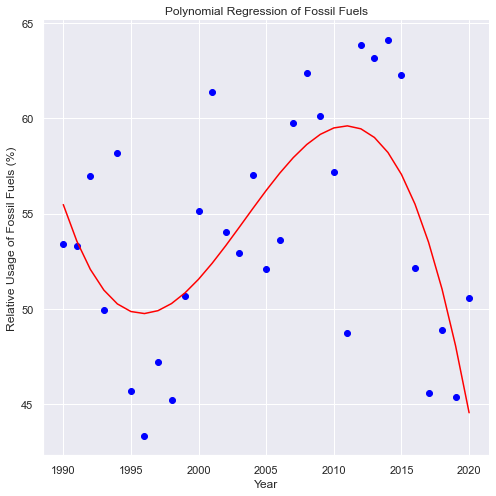

Mean absolute error: 3.88
Residual sum of squares (MSE): 21.77
R2-score: 0.41




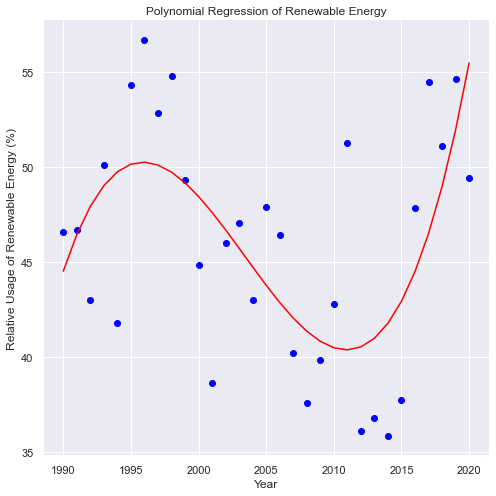

Mean absolute error: 3.88
Residual sum of squares (MSE): 21.77
R2-score: 0.41




In [15]:
# *** Question 3a ***
#Polynomial Regression
"""
After building the linear regression model, I knew that my data did not have a linear relationship. Since my
research questions are to calculate when California will be 100% powered by renewables and the relative usage of
different energy sources in that year, I knew that I needed a better regression model in order to answer my research
questions. So, I thought of polynomial regression and finding the optimal number of degrees, as I thought a
polynomial function would better fit my data.
"""
from sklearn.preprocessing import PolynomialFeatures

def train_test_poly(col, degree, opt):
    #Train/test split
    poly = PolynomialFeatures(degree= degree, include_bias=False)
    poly_reg_model = linear_model.LinearRegression()
    train_x = np.asanyarray(cat_df[['Year']])
    train_y = np.asanyarray(cat_df[[col]])
    poly_features = poly.fit_transform(train_x.reshape(-1, 1))
    poly_reg_model.fit(poly_features, train_y)
    train_y_ = poly_reg_model.predict(poly_features)
    
    if opt == True: #Only when model is optimized
        #Plot model
        plt.scatter(train_x, train_y, color='blue')
        plt.plot(train_x, train_y_, c="red")
        plt.xlabel("Year")
        plt.ylabel("Relative Usage of " + col + " (%)")
        plt.title("Polynomial Regression of " + col)
        sns.despine(right=True) #Remove line on the right
        plt.show()
        plt.close()
    
    #Test accuracy
    test_x = np.asanyarray(cat_df[['Year']])
    poly_features_test = poly.fit_transform(test_x.reshape(-1, 1))
    test_y = np.asanyarray(cat_df[[col]])
    test_y_ = poly_reg_model.predict(poly_features_test)
    
    if opt == False: #For optimizing model
        mean_absolute_error = np.mean(np.absolute(test_y_ - test_y))
        mse = np.mean((test_y_ - test_y) ** 2)
        r2 = r2_score(test_y , test_y_)
   
        return mean_absolute_error, mse, r2

    if opt == True: #Accuracy evaluation of optimized model
        print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
        print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
        print("R2-score: %.2f" % r2_score(test_y , test_y_))
        print("\n")
    
    
#Find optimal degree for polynomial
mae_list = []
mse_list = []
r2_list = []
for val in range(1, 11):
    mean_absolute_error, mse, r2 = train_test_poly('Fossil Fuels', val, False)
    mae_list.append(mean_absolute_error)
    mse_list.append(mse)
    r2_list.append(r2)
    
print(mae_list.index(min(mae_list)) + 1) #Add one because index starts at 0
print(mse_list.index(min(mse_list)) + 1)
print(r2_list.index(max(r2_list)) + 1)
    
#Do Polynomial Regression for Fossil Fuel + Renewable Energy
train_test_poly('Fossil Fuels', 3, True)
train_test_poly('Renewable Energy', 3, True)

In [16]:
# *** Question 3a ***
#Analysis of Polynomial Regression
'''
Although the polynomial regression is more accurate than the linear regression (especially after I optimized the
number of degrees) to improve the accuracy, I felt that a R2-score of 0.41 was still a bit too low and 
I could improve the accuracy with a different model. This is due to the small sample size (30),
which limits the accuracy of the model
'''

'\nAlthough the polynomial regression is more accurate than the linear regression (especially after I optimized the\nnumber of degrees) to improve the accuracy, I felt that a R2-score of 0.41 was still a bit too low and \nI could improve the accuracy with a different model.\n'

{'n_neighbors': 2}
Evaluating accuracy for: Fossil Fuels
MSE:  13.399181535043487
R2 score: 0.6384113676386312


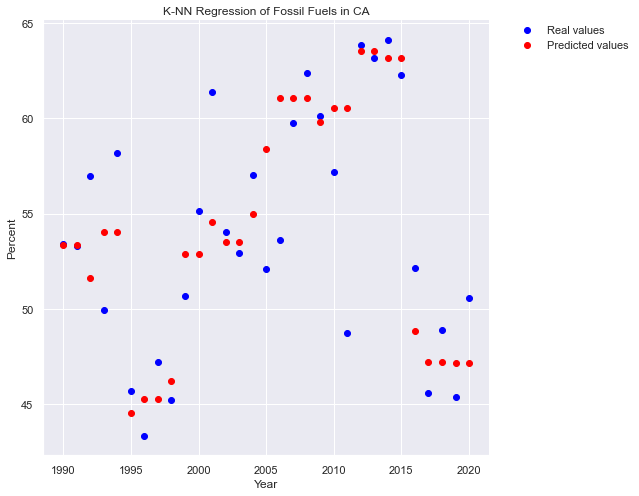

{'n_neighbors': 2}
Evaluating accuracy for: Renewable Energy
MSE:  13.399181630751626
R2 score: 0.6384113681415962


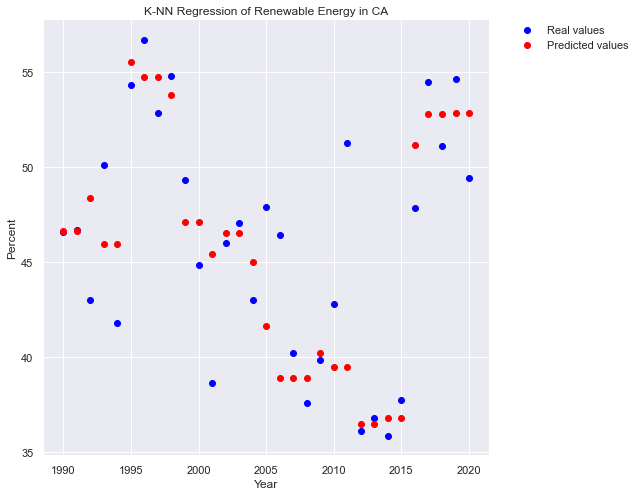

In [17]:
# *** Question 3a ***
#Do K-NN Regression
"""
Since my y values are continuous, I thought that K-NN Regression would be more accurate than polynomial regression.
I thought that since K-NN regression uses data points close to the predicted value for predictions, 
it would be more accurate than polynomial regression, as the K-NN regression predictions are based on similarities
and not a function.
"""
from sklearn.neighbors import KNeighborsRegressor

def k_nn_regression(col):
    #Train/test split
    X = np.asanyarray(cat_df[['Year']])
    y = np.asanyarray(cat_df[[col]])
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    #Determine best K-value
    from sklearn.model_selection import GridSearchCV #Find best K value

    params = {'n_neighbors':[2,3,4,5,6,7,8,9]} #Potential K values to test

    knn = KNeighborsRegressor() #Initialize unfitted model

    #Finds K value w/ least error
    model = GridSearchCV(knn, params, cv=5)
    model.fit(X_train,y_train)
    print(model.best_params_)

    #Build model with best K value
    knn=KNeighborsRegressor(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred_knn=knn.predict(X_test)

    
    #Evaluate model performance
    from sklearn.metrics import r2_score
    from math import sqrt
    from sklearn.metrics import mean_squared_error
    print("Evaluating accuracy for: " + col)
    print("MSE: ", mean_squared_error(y,knn.predict(X)))
    print("R2 score:", r2_score(y,knn.predict(X)))

    
    #Plot model
    plt.scatter(X, y, color = "blue", label = "Real values")
    plt.scatter(X,knn.predict(X),color="red", label = "Predicted values")
    plt.xlabel("Year")
    plt.ylabel("Percent")
    plt.title("K-NN Regression of " + col + " in CA")
    sns.despine(right=True) #Remove line on the right
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) #Move legend out of graph
    plt.show()
    plt.close()

#Do K-NN Regression for Fossil Fuel + Renewable Energy
k_nn_regression('Fossil Fuels')
k_nn_regression('Renewable Energy')

In [18]:
# *** Question 3a ***
#Analysis of K-NN Regression
'''
K-NN regression did have a higher accuracy than linear and polynomial regression, with the K-NN regression model 
having both a lower MSE and R2 score than both the linear and polynomial regression models. However, even after 
optimizing the K-value to improve the accuracy, the K-NN regression model still had a MSE of ~13.4 and an R2 score 
of ~0.64. This is because the dataset was very small (30 samples) and had a large variation, so even the K-NN 
regression would not be able to be highly accurate.
'''

'\nI was correct in believing that K-NN regression would be more accurate than linear and polynomial regression.\nHowever, even after optimizing the K-value to improve the accuracy, I still ended up with a MSE of ~13.4 and an \nR2 score of ~0.64. I realized that my dataset was very small (30 samples) and had a large variation, so even the \nK-NN regression would not be able to be highly accurate.\n'

### b) Predictive and Classification Algorithms

/Users/av/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


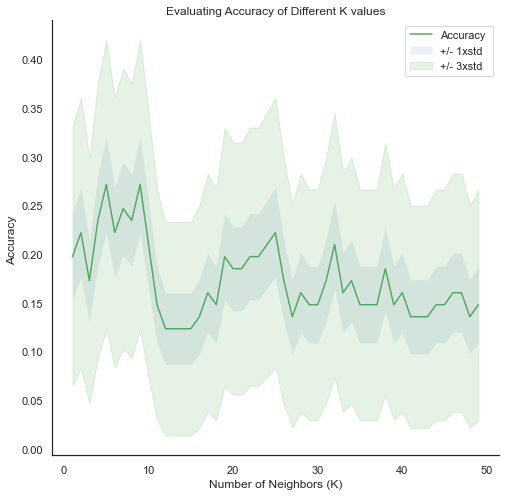

The best accuracy was 0.2716049382716049 with k= 5


[0.36585366 0.34146341 0.43902439 0.275      0.325      0.325
 0.35       0.275      0.35       0.275     ] 

Mean accuracy: 0.33213414634146343


In [32]:
# *** Question 3b ***
'''
K-NN Classification

For the classification and clustering algorithms, I switched from using the fossil fuel vs renewable energy dataset
(cat_df) to the all energy sources (all_years) dataset, as I wanted to have a holistic view of the dataset. 
In doing K-NN classification, I was trying to identify whether the different energy sources have 
intrinsic properties that a model could pick up on. Because there are many variables in the usage of a certain 
type of energy source, I thought using just a relative percentage would prevent over-fitting and allow all the 
variables to be implicitly included.


Steps:
1. Create dataset with columns of year, percent, energy source
2. Do K-NN Classification
'''

#Step 1: Create dataset with columns of year, percent, energy source
to_group_df = all_years.set_index('Year')
to_group_df = to_group_df.stack().reset_index(level=1, name='Percent').rename(columns={'level_1':'Energy Source'})[['Percent','Energy Source']]
to_group_df.reset_index(inplace=True)


#Step 2: Do K-NN Classification
#Create X and Y variables
X = to_group_df[['Year', 'Percent']].values 
y = to_group_df[['Energy Source']].values

#Need to convert Energy Source to Numeric
from sklearn import preprocessing
label_encoder_energy = preprocessing.LabelEncoder()
label_encoder_energy.fit(['Coal', 'Other Biomass', 'Other', 'Wind', 'Hydro', 'Solar', 'Geothermal', 'Nuclear', 'Petroleum','Pumped Storage','Wood and Wood Derived Fuels','Natural Gas','Other Gases'])
y = label_encoder_energy.transform(y)

#Normalize data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#Build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

#Plot model accuracy for different K-Values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.title('Evaluating Accuracy of Different K values')
sns.despine(right=True) #Remove line on the right
plt.show()
plt.close()

#Identify best K-Value
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)
print('\n')


#With K-fold cross validation
from sklearn.model_selection import cross_val_score
true_neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1)
true_scores = cross_val_score(true_neigh, X, y, cv= 10)


#Evaluate accuracy of K-Fold Cross Validation

print(true_scores, "\n")
print("Mean accuracy:", np.mean(true_scores))


In [31]:
# *** Question 3b ***
#Analysis of K-NN Classification
'''
I was incorrect in believing that the different types of energy sources had intrinsic differentiators that a model
could pick up. Even though I optimized the K-value and performed K-Fold cross validation to improve the accuracy
of the model, the model still had a mean accuracy of ~0.35, which is low. This result suggests that I have an 
incomplete view of the factors affecting relative energy sources in CA and that I need to conduct further research
in order to have a complete holistic view of the situation and allow a model to be accurate.
'''

'\nI was incorrect in believing that the different types of energy sources had intrinsic differentiators that a model\ncould pick up. Even though I optimized the K-value and performed K-Fold cross validation to improve the accuracy\nof the model, the model still had a mean accuracy of ~0.35, which is low. This result suggests that I have an \nincomplete view of the factors affecting relative energy sources in CA and that I need to conduct further research\nin order to have a complete holistic view of the situation and allow a model to be accurate.\n'

### c) Clustering

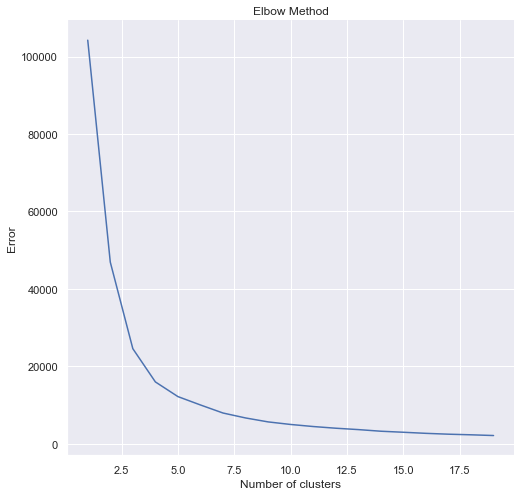

Elbow Point:  4


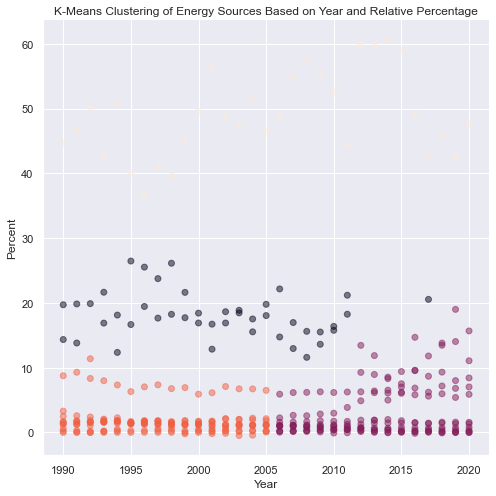

In [21]:
# *** Question 3c ***
'''
K-Means Clustering

Because I am using the all_years dataset, which has a value for each energy source in CA for each year from 1990
-2020, my dataset was ~400 rows long. So, I was not able to use any form of hierarchical clustering, as it would
have been too slow and would have created a complicated and cluttered dendrogram, though it would have provided
insight into how important the year and type of energy source were as factors in relative usage. Instead, I used
K-Means Clustering. My main goal with K-Means Clustering was to see if the model would be able to group the energy
sources together without any labeling (an extension of the intrinsic properties of the energy sources investigated
with the K-Means Classification Model).

Steps:
1. Use to_group_df as dataset for training + testing
2. Do K-Means clustering w/ K-Fold cross Validation
'''

#Define X
X_cluster = to_group_df[['Year', 'Percent']].values 

#Pre-processing
from sklearn.preprocessing import StandardScaler
X_cluster = np.nan_to_num(X_cluster)
Cluster_dataset = StandardScaler().fit_transform(X_cluster)

#Build model
from sklearn.cluster import KMeans
#Find optimal n_clusters
elbow_data_pts = []
for num in range(1, 20):
    k_means = KMeans(init = "k-means++", n_clusters = num, n_init = 20)
    k_means.fit(X_cluster)
    elbow_data_pts.append(k_means.inertia_) #Error
    
#Plot elbow graph
plt.plot(range(1, 20), elbow_data_pts)
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.title('Elbow Method')
sns.despine(right=True) #Remove line on the right
plt.show()
plt.close()

#Calculate elbow pt
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, 20), y = elbow_data_pts, curve = "convex", direction = "decreasing")
elbow_pt = kneedle.elbow
print('Elbow Point: ', elbow_pt)


#Do K-Means Cluster w/ optimal n_clusters
true_k_means = KMeans(init = "k-means++", n_clusters = elbow_pt, n_init = 20)
true_k_means.fit(X_cluster)


#Visualize K-Means Cluster

labels = true_k_means.labels_
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels.astype(float), alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title("K-Means Clustering of Energy Sources Based on Year and Relative Percentage")
sns.despine(right=True) #Remove line on the right
plt.show()
plt.close()

In [22]:
# *** Question 3b ***
#Analysis of K-Means Clustering
'''
Based on my results with K-NN Classification, I believed that the K-Means Clustering model would not be accurate,
as I had already realized that there are certain variables that I had not considered. I did use the elbow method
to find the best value of K for the K-Means Clustering model (in order to improve accuracy), but this k value did 
have a high error. The results showed that the model grouped mainly by percentage, which I did expect. After 
creating both K-NN Classification and K-Means Clustering models, I fully realized that I would need to add more 
variables to the dataset in order to improve the accuracy of the model.
'''

'\nBased on my results with K-NN Classification, I believed that the K-Means Clustering model would not be accurate,\nas I had already realized that there are certain variables that I had not considered. I did use the elbow method\nto find the best value of K for the K-Means Clustering model (in order to improve accuracy), but this k value did \nhave a high error. The results showed that the model grouped mainly by percentage, which I did expect. After \ncreating both K-NN Classification and K-Means Clustering models, I fully realized that I would need to add more \nvariables to the dataset in order to improve the accuracy of the model.\n'

## 4) Data Science Life Cycle
### a) Preprocessing: 
       - Implemented on a per-algorithm basis (if neccesary) before testing each algorithm
### b) Divide data into training + test set:
       - Implemented into algorithms before testing
### c) Evaluate 1st algorithm: 
       - Linear regression has a MSE of 36.15 and an R2 score of 0.02. This shows that year and fossil fuel/renewable usage is not a linear relationship. This is further supported by the correlation coefficient magnitude of 0.156005, which also shows that year and fossil fuel/renewable usage is not a linear relationship     
### d) Evaluate variety of algorithms:
       - Out of the 3 regression algorithms (linear, polynomial, K-NN), K-NN has the highest accuracy with a MSE of 13.39 and an R2 score of 0.64. However, this is still not a very high accuracy. This is because the dataset is very small (only 30 rows).

### 3) Choose the best model and present the results: 
- k-NN regression with k = 2 had the highest accuracy out of all the algorithms tested, so it will be used to predict when California will be 100% powered by renewables.

In [23]:
# *** Question 4c *** Answering Research Question 1: When will CA be 100% powered by renewables?
#K-NN Regression
from sklearn.neighbors import KNeighborsRegressor

def k_nn_regextend(col):
    X = np.asanyarray(cat_df[['Year']])
    y = np.asanyarray(cat_df[[col]])

    #Build model with best K value
    knn=KNeighborsRegressor(n_neighbors=2) #Already know this from previous implementation
    knn.fit(X, y)
    
    years_extended = np.arange(1990, 2100, 1)
    years_extended = years_extended.reshape(-1, 1)
    print(knn.predict(years_extended))

k_nn_regextend('Renewable Energy')



[[46.64799105]
 [46.64799105]
 [44.86753926]
 [46.55267764]
 [45.95298832]
 [48.07574253]
 [55.49163862]
 [54.73822162]
 [53.79503973]
 [52.04580676]
 [47.09668229]
 [41.7525357 ]
 [42.30537668]
 [46.51809037]
 [45.02263407]
 [45.44782233]
 [47.15304288]
 [43.32560117]
 [38.93255094]
 [38.73435437]
 [41.32560467]
 [47.02269398]
 [43.69000705]
 [36.4707103 ]
 [36.34996506]
 [36.81529511]
 [42.80204099]
 [51.15703839]
 [52.78108153]
 [52.86038054]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946086]
 [52.01946

In [24]:
"""
Analysis: K-NN regression has the highest training accuracy but it is unable to predict future values beyond 2020.
So, even though polynomial regression has a lower accuracy than K-NN regression, it will be used to answer the 
research questions.
"""

'\nAnalysis: K-NN regression has the highest training accuracy but it is unable to predict future values beyond 2020.\nSo, even though polynomial regression has a lower accuracy than K-NN regression, it will be used to answer the \nresearch questions.\n'

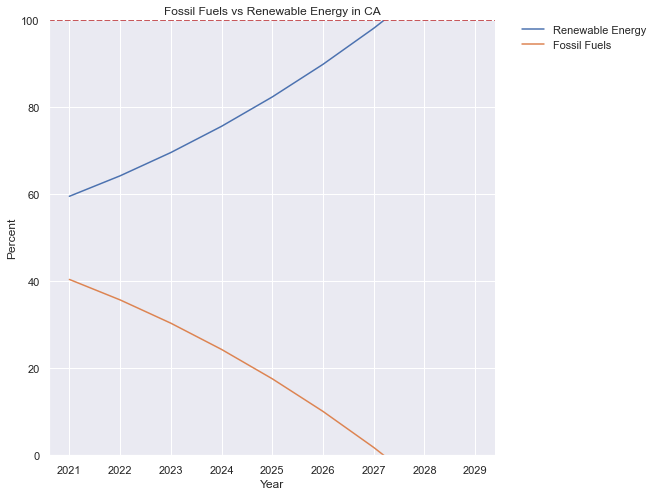

In [25]:
# *** Question 4c *** Answering Research Question 1: When will CA be 100% powered by renewables?
#Polynomial Regression For Renewable Energy
from sklearn.preprocessing import PolynomialFeatures

def poly(col):
    #Build model based on degree = 3 from earlier
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_reg_model = linear_model.LinearRegression()
    train_x = np.asanyarray(cat_df[['Year']])
    train_y = np.asanyarray(cat_df[[col]])
    poly_features = poly.fit_transform(train_x.reshape(-1, 1))
    poly_reg_model.fit(poly_features, train_y)
    train_y_ = poly_reg_model.predict(poly_features)
    
    #Make and plot prediction
    years_extended = np.arange(2021, 2030, 1) #Prediction for next 10 years
    years_extended_transformed = poly.fit_transform(years_extended.reshape(-1, 1))
    prediction = poly_reg_model.predict(years_extended_transformed)
    plt.plot(years_extended, prediction, label = col)
    plt.xlabel('Year')
    plt.ylabel('Percent')
    plt.title('Fossil Fuels vs Renewable Energy in CA')
    plt.ylim(0, 100)
    sns.set_style('white') #Set background to just white
    sns.despine(right=True) #Remove line on the right
    plt.axhline(y = 100, color = 'r', linestyle = '--') #Show when 100% renewables in achieved
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
#Do Polynomial Regression for Fossil Fuel + Renewable Energy
poly('Renewable Energy')
poly('Fossil Fuels')


In [26]:
"""
Analysis of Results:
Polymomial Regression is limited in that Renewable Energy usage cannot go beyond 100%. So, all values over 100%
must be disregarded. However, this polynomial regression does suggest that between 2027 and 2028 (beginning of 2028)
, California will be 100% powered by renewables. Because the regression uses polynomial of degree 3, the values for
renewables increase at an exponential rate. Thus, a 100% value for renewables is likely after 2027-2028, though the
large percentage increase of solar (~7000% in the last 8 years) may counteract this.
"""

'\nAnalysis of Results:\nPolymomial Regression is limited in that Renewable Energy usage cannot go beyond 100%. So, all values over 100%\nmust be disregarded. However, this polynomial regression does suggest that between 2027 and 2028 (beginning of 2028)\n, California will be 100% powered by renewables. Because the regression uses polynomial of degree 3, the values for\nrenewables increase at an exponential rate. Thus, a 100% value for renewables is likely after 2027-2028, though the\nlarge percentage increase of solar (~7000% in the last 8 years) may counteract this.\n'

In [27]:
"""
Types of Renewable Energy: Let's further investigate the rest of the energy sources using this model. Note that the
energy sources which did not have a max value >= 5 from 1990 - 2020 were not included, as they cluttered the 
following graph.
"""

"\nTypes of Renewable Energy: Let's further investigate the rest of the energy sources using this model. Note that the\nenergy sources which did not have a max value >= 5 from 1990 - 2020 were not included, as they cluttered the \nfollowing graph.\n"

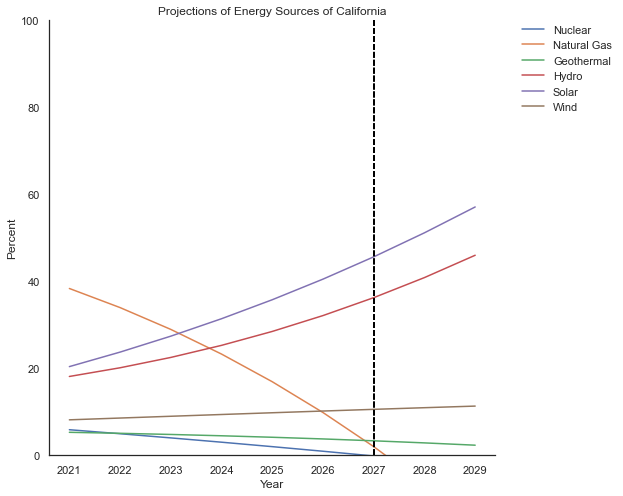

In [28]:
# *** Question 4c ***
"""
Answering Research Question 2: What will be the relative usages of different energy types the year that CA is 100%
powered by renewables?
"""
#Polynomial Regression For Solar and Natural Gas
from sklearn.preprocessing import PolynomialFeatures

def poly_all(col):
    #Build model
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_reg_model = linear_model.LinearRegression()
    train_x = np.asanyarray(cat_df[['Year']])
    train_y = np.asanyarray(all_years[[col]])
    poly_features = poly.fit_transform(train_x.reshape(-1, 1))
    poly_reg_model.fit(poly_features, train_y)
    train_y_ = poly_reg_model.predict(poly_features)
    
    #Make and plot prediction
    years_extended = np.arange(2021, 2030, 1) #Prediction for next 10 years
    years_extended_transformed = poly.fit_transform(years_extended.reshape(-1, 1))
    prediction = poly_reg_model.predict(years_extended_transformed)
    plt.plot(years_extended, prediction, label = col)
    plt.xlabel('Year')
    plt.ylabel('Percent')
    plt.title('Projections of Energy Sources of California')
    plt.ylim(0, 100)
    plt.axvline(x = 2027, color = 'black', linestyle = '--') #Show relative %s when CA is 100% renewables
    sns.set_style('white') #Set background to just white
    sns.despine(right=True) #Remove line on the right
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
#Do Polynomial Regression for Fossil Fuel + Renewable Energy
l = [] #Empty list
for col in all_years_to_plot: #Only plotting the major energy sources (1990 - 2020 max >= 5%) so that the graph is not crowded
    l.append(col)
l #List of all energy sources
for source in l:
    poly_all(str(source))

In [29]:
"""
Analysis of Results:
The polynomial regression model suggests that solar and hydro will be the most prominent renewables in 2027 (with
solar being the most prominent renewable), when CA is 100% powered by renewables. The solar prediction aligns
with the exponential increase (~700% in the last 8 years) that solar has had so far. However, from 1990 - 2020,
hydro has had a ~23% decrease in relative usage, while wind has had a 322% increase in usage. This may be due to
the model identifying an implicit variable related to hydro usage that is not immediately seen.
"""

'\nAnalysis of Results:\nThe polynomial regression model suggests that solar and hydro will be the most prominent renewables in 2027 (with\nsolar being the most prominent renewable), when CA is 100% powered by renewables. The solar prediction aligns\nwith the exponential increase (~700% in the last 8 years) that solar has had so far. However, from 1990 - 2020,\nhydro has had a ~23% decrease in relative usage, while wind has had a 322% increase in usage. This may be due to\nthe model identifying an implicit variable related to hydro usage that is not immediately seen.\n'

### Improving Accuracy & Moving forward: 
       1. Identify more variables that affect the relative usage of different energy types in CA (e.g. political
       ideology, GDP, useable area of state, etc..) and add them to the database & models.
          a. This would generalize the model more and allow it to be applied to different states & countries.
          
       2. Test these models with data of different states & countries in order to identify whether the data is     over-fit or needs more variables to be accurate.
       
       3. Add data from 2021 and 2022 to improve the accuracy of the model.
       
       4. Use more algorithms (e.g. neural network, logistic regression) in order to improve the accuracy of the chosen model by evaluating more model options.